In [1]:
from astropy.io import fits
from photutils import DAOStarFinder
from astropy.stats import sigma_clipped_stats
import matplotlib.pyplot as plt
from photutils import CircularAperture
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import aperture_photometry
import numpy as np
from scipy.optimize import leastsq
import pylab as pylab
from matplotlib.mlab import find

ImageOne = 'multidayone.fits'
ImageTwo = 'multidaytwo.fits'
ImageThree = 'multidaythree.fits'
ImageFour = 'multidayfour.fits'
ImageFive = 'multidayfive.fits'
ImageSix = 'multidaysix.fits'
ImageSeven = 'multidayseven.fits'
ImageEight = 'multidayeight.fits'
ImageNine = 'multidaynine.fits'
ImageTen = 'multidayten.fits'
ImageEleven = 'multidayeleven.fits'
ImageTwelve = 'multidaytwelve.fits'
ImageThirteen = 'multidaythirteen.fits'
ImageFourteen = 'multidayfourteen.fits'

MinSep = 0.8 #sets value for discriminating sources
N = 14 #number of images minus 1 as it starts from zero
t = [ImageOne, ImageTwo, ImageThree, ImageFour, ImageFive, ImageSix, ImageSeven, 
    ImageEight, ImageNine, ImageTen, ImageEleven, ImageTwelve, ImageThirteen, ImageFourteen]
imno = 0
imagedata = dict()
sources = dict()
Date = dict()
for imno in range(0, N):
    hdu_list = fits.open(t[imno])
    imagedata[imno] = hdu_list[0].data
    mean, median, std = sigma_clipped_stats(imagedata[imno], sigma=3.0, iters=5) 
    daofind = DAOStarFinder(fwhm=7.0, threshold=5.*std)
    sources[imno] = daofind(imagedata[imno]- median)
    Date[imno] = hdu_list[0].header['MJD-OBS']
    #print(Date[imno])
    #print(sources[imno]) 
    #print(std)


TypeError: __init__() missing 1 required positional argument: 'fwhm'

0.00842138312663
Object 0
0.0545795950684
Object 1
0.00172319171787
Object 2
0.000286760705502
Object 3
variable object 4


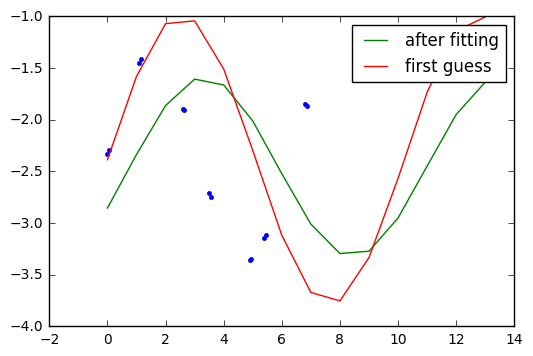

0.867761381851 *sin (t + -0.475547414308 )+ -2.45701455758
period = 10.3629454852
0.658517898522
Object 4
0.0719150359933
Object 5
0.000330664499296
Object 6
0.000212861371534
Object 7


In [173]:
#n = 0 # obsolete!
x = 0 #cycles through possible objects starting at zero
Q =[0] #used to define corresponding objects
num = 0 #used for sources[]

#Q = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#Q = [a, b, c, d, e, f, g, h, i, j, k, l, m] #sets itteration letter

y = (sources[num][-1][0]-1)
ystart = (sources[0][-1][0])

#av = dict()
#tot = dict()
#Detect = dict()
#mag = dict()
#finalstd = dict()
#totstd = dict()

av = [0] * ystart
tot = [0] * ystart
Detect = [0] * ystart
#mag = [0] * N
std = [0] * N
totstd = [0] * ystart
finalstd = [0] * ystart


for x in range(0, ystart):
    for num in range(0, N):#itterates over all images loaded
        y = (sources[num][-1][0])#-1) #appened y through the loop
        for Q[n] in range(0, y): #change values of object depending
            #y = (sources[num][-1][0]-1)
            if ((sources[0][x][2] - sources[num][Q[n]][2])**2) < (0.8**2): #if its the same then stop
                #print(Q[n], num, x, y)
                tot[x] = tot[x] + sources[num][Q[n]][10] #calculate mag total
                Detect[x] = Detect[x] + 1 #number of detections
                #mag[num] = sources[num][Q[n]][10]
                if num == 0:
                    DateObs = [Date[0]] #sets date for each new object and begging of sequence
                    mag = [sources[num][Q[n]][10]] #sets mag like above
                else:
                    DateObs.extend([Date[num]]) # appends date of observation and takes into account when the object isnt detected
                    mag.extend([sources[num][Q[n]][10]]) #appends mag
                break
            
            #else:
               # Q[n] == y:
    av[x] = tot[x]/Detect[x]
    std = [((z - av[x])**2) for z in mag]
    totstd[x] = sum(std)
    finalstd[x] = (totstd[x]/Detect[x])**0.5
    if finalstd[x] > 0.1:
        print('variable object', x)
        plt.plot(DateObs, mag)
        plt.show()
        
        guess_mean = av[x]
        guess_std = (3 * finalstd[x])/(2**0.5)
        guess_phase = 0
        datay = mag
        datax = [ q - 49552 for q in DateObs]
        
        t = np.linspace(0, 8, N)
        data_first_guess = guess_std*np.sin(t) + guess_mean
        optimize_func = lambda x: x[0]*np.sin(t+x[1]) + x[2] - datay
        est_std, est_phase, est_mean = leastsq(optimize_func, [guess_std, guess_phase, guess_mean])[0]
        data_fit = est_std*np.sin(t+est_phase) + est_mean
        pylab.plot(datax, datay, '.')
        pylab.plot(data_fit, label='after fitting')
        pylab.plot(data_first_guess, label='first guess')
        pylab.legend()
        pylab.show()
        #print(t)
        print(est_std,'*sin (t +', est_phase,')+', est_mean)
        
        indices = find((data_fit[1:] >= est_mean) & (data_fit[:-1] < est_mean))
        crossings1 = [i - data_fit[i] / (data_fit[i+1] - data_fit[i]) for i in indices]
    
        print('period =', crossings1[1] - crossings1[0])

    print(finalstd[x])
    print('Object', x) # tot[x]/Detect[x], finalstd[x])
    
    


In [66]:
for Q[n] in range(0, y): #change values of object depending
        if ((sources[0][3][2] - sources[num][Q[n]][2])**2) < (0.8**2): #if its the same then stop
            break
        else:
            print('object not found')

y = (sources[num][-1][0]-1) #appened y through the loop
print(Q[n], n, num, 3, y)        #print all the way through

object not found
object not found
object not found
3 8 13 3 7


In [156]:
print(DateObs)

[49551.9999131944, 49552.0499131944, 49553.0999131944, 49553.1499131944, 49554.5999131944, 49554.6499131944, 49555.5499131944, 49556.8999131944, 49556.9499131944, 49557.3999131944, 49557.4499131944, 49558.8499131944]


In [157]:
print(mag)

[-0.46756062569215334, -0.37004559759468714, -0.40700799987926695, -0.49170019089570499, -0.22220921331731483, -0.45737158639377795, -2.7088714246353645, -0.48082803488620252, -0.38058331458426731, -0.37874696858532364, -0.40385516892363638, -0.34350272961637779, -1.8448501188901094, -0.4543085995755281]


In [93]:
print(tot)

[-47.415158269312776, -18.393276181310501, -75.58347603228701, -128.72721882056072, -33.414291915663661, -4.8577200299442405, -113.33667359016559, -120.30119644356367]


In [115]:
print(tot)

[-47, 0, 0, 0, 0, 0, 0, 0]


In [137]:
print(Detect[5])

12


In [142]:
print(Date[1])

49552.0499131944
